# Майнор биоинформатика 2 год #

## Домашнее задание 1 ##

### Колчина Анастасия 4 группа ###

### 1. Список команд, выполненных на сервере ###


Создаем папочки:
```
$ mkdir hw1
$ cd hw1
$ mkdir reads
$ cd reads
```
Создаем символические ссылки на риды:
```
$ ls /usr/share/data-minor-bioinf/assembly/* | xargs -tI{} ln -s {}
```
С помощью команды seqtk выбираем случайно 5 миллионов чтений типа paired-end и 1.5 миллиона чтений типа mate-pairs:
```
$ seqtk sample -s126 oil_R1.fastq 5000000 > pe1.fastq
$ seqtk sample -s126 oil_R2.fastq 5000000 > pe2.fastq

$ seqtk sample -s126 oilMP_S4_L001_R1_001.fastq 1500000 > mp1.fastq
$ seqtk sample -s126 oilMP_S4_L001_R2_001.fastq 1500000 > mp2.fastq
```
Запустим fastqc, чтобы оценить качество исходных чтений:
```
$ mkdir fastqc
$ ls pe* mp* | xargs -P 4 -tI{} fastqc -o fastqc {}

$ mkdir multiqc
$ multiqc -o multiqc fastqc
```
Скачаем отчет с сервера на локальную машину. Для этого заходим в папку с ключом mykey для доступа на сервер и пишем следующую команду:
```
scp -P 5222 -i mykey akkolchina@92.242.58.92:~/hw1/reads/multiqc/multiqc_report.html ~/bio_minor/multiqc
```
Открываем html файл multiqc и видим следующую статистику:

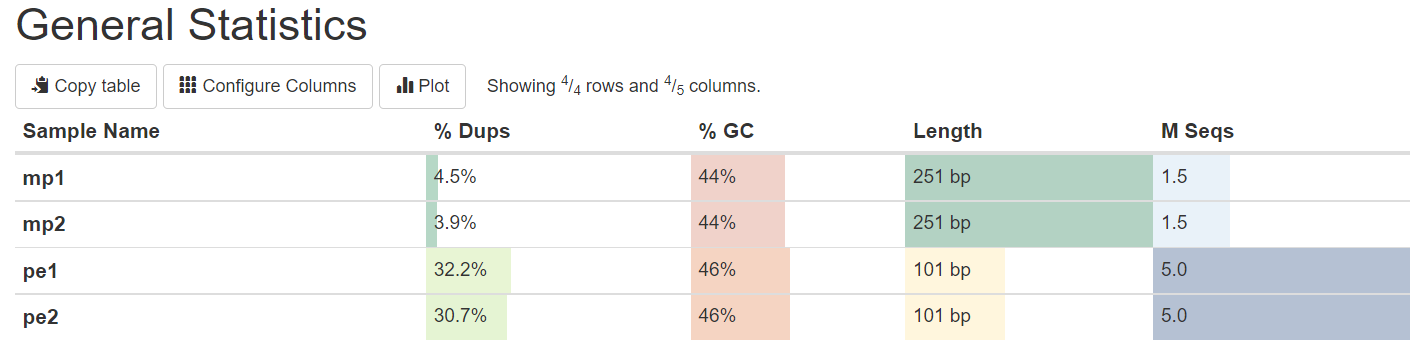

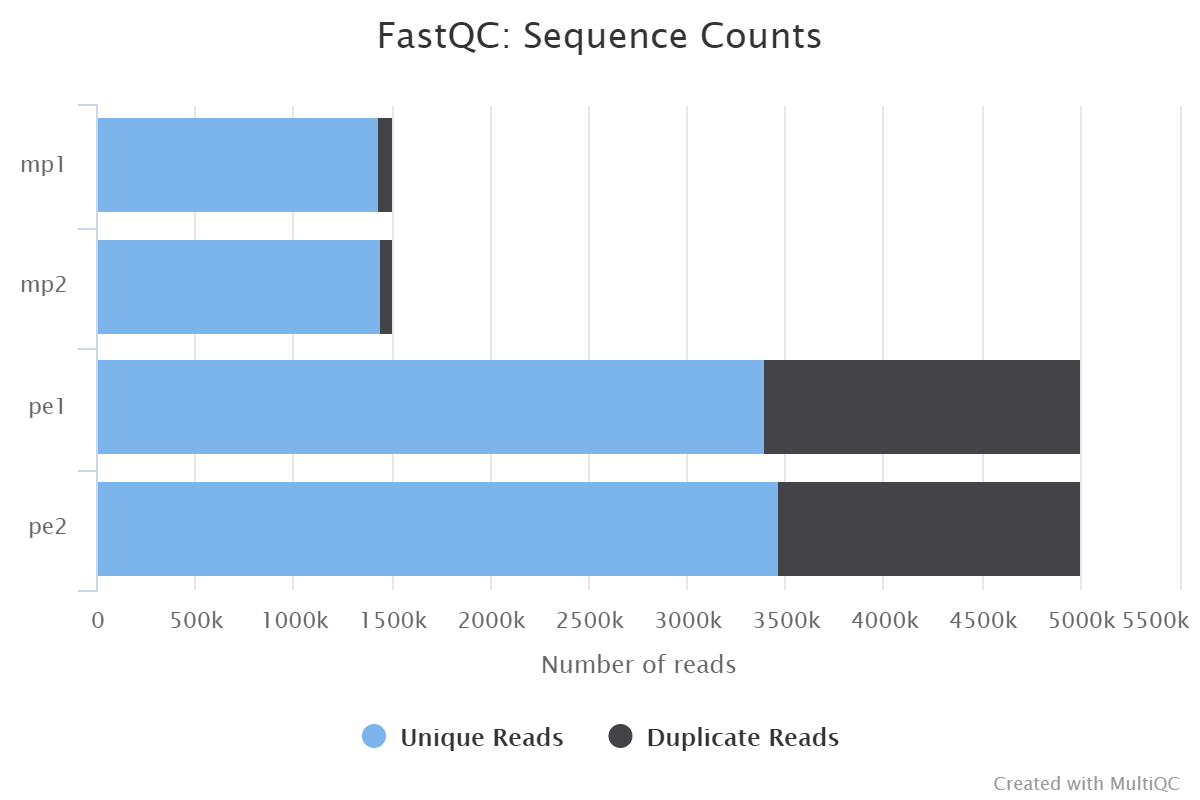

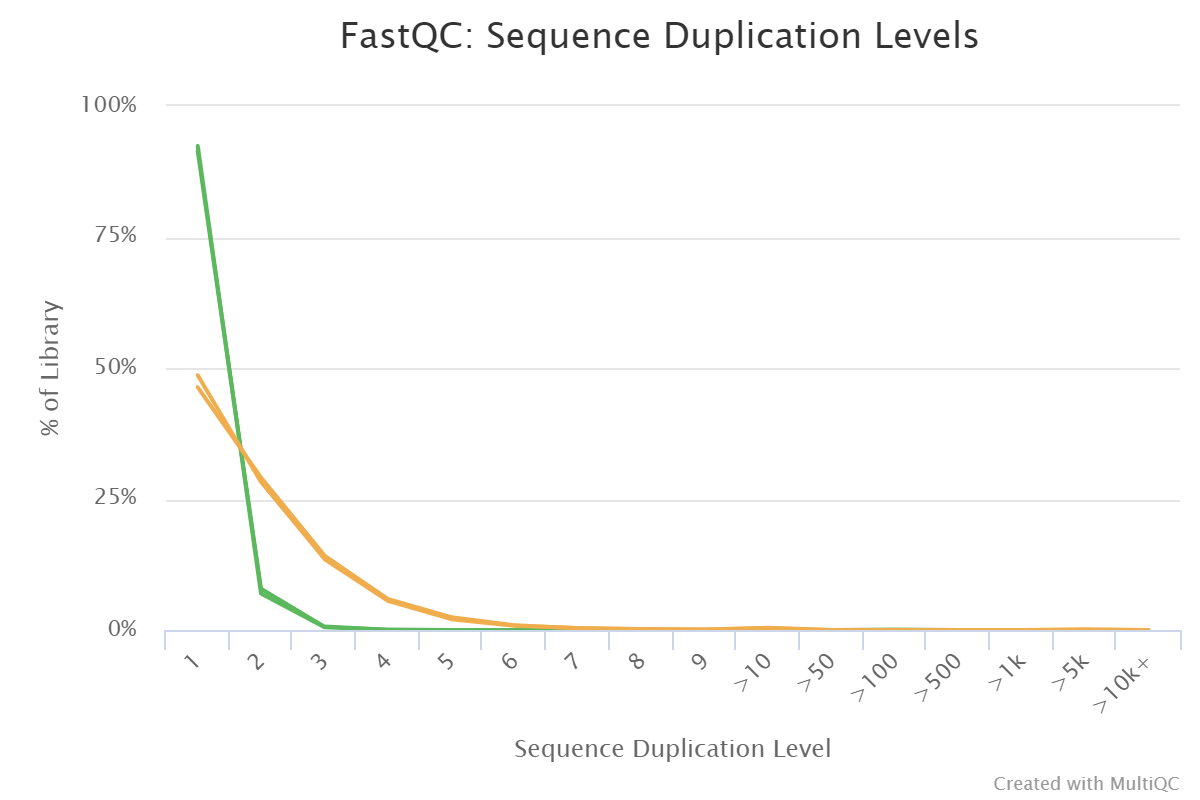

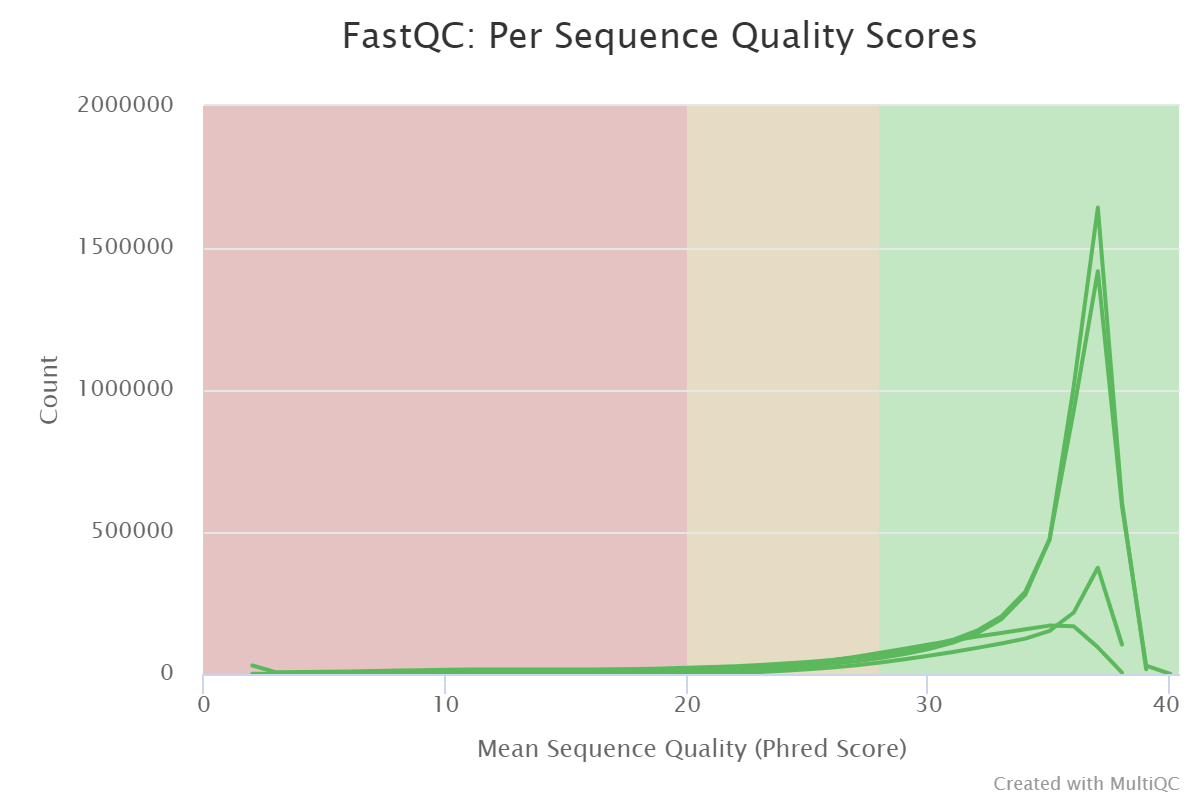

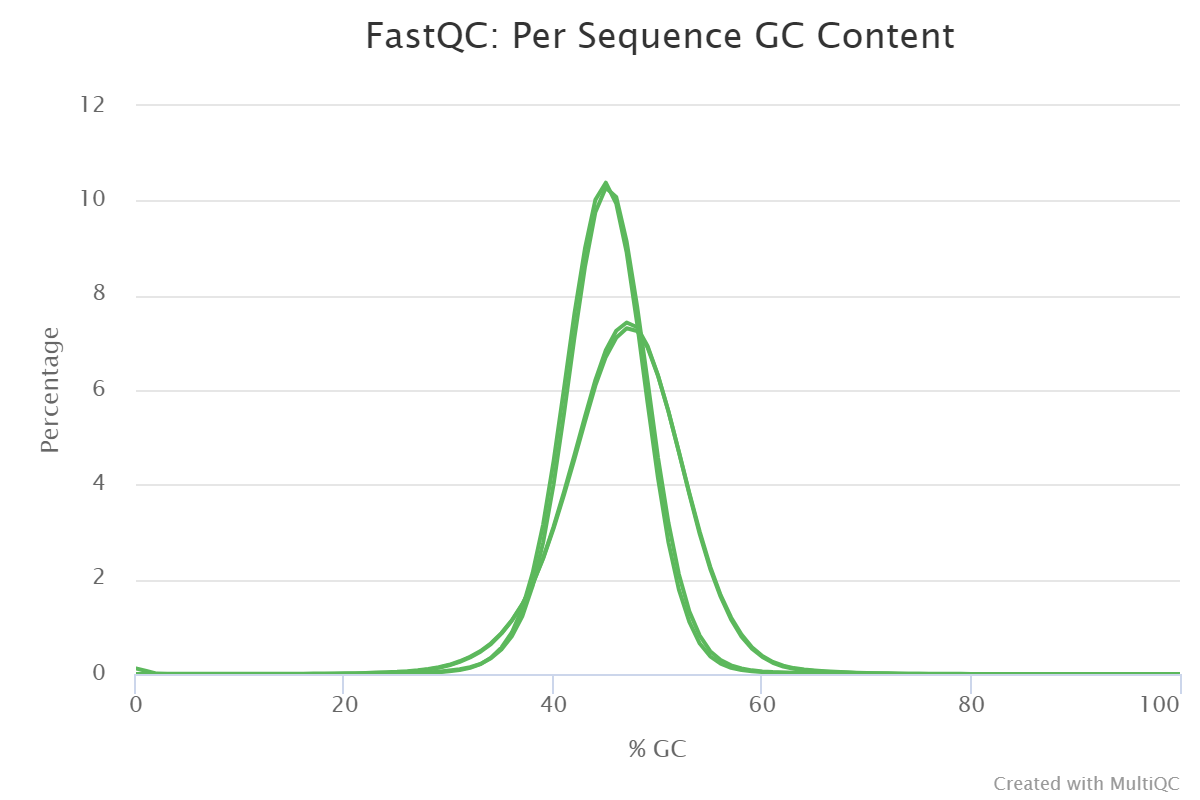

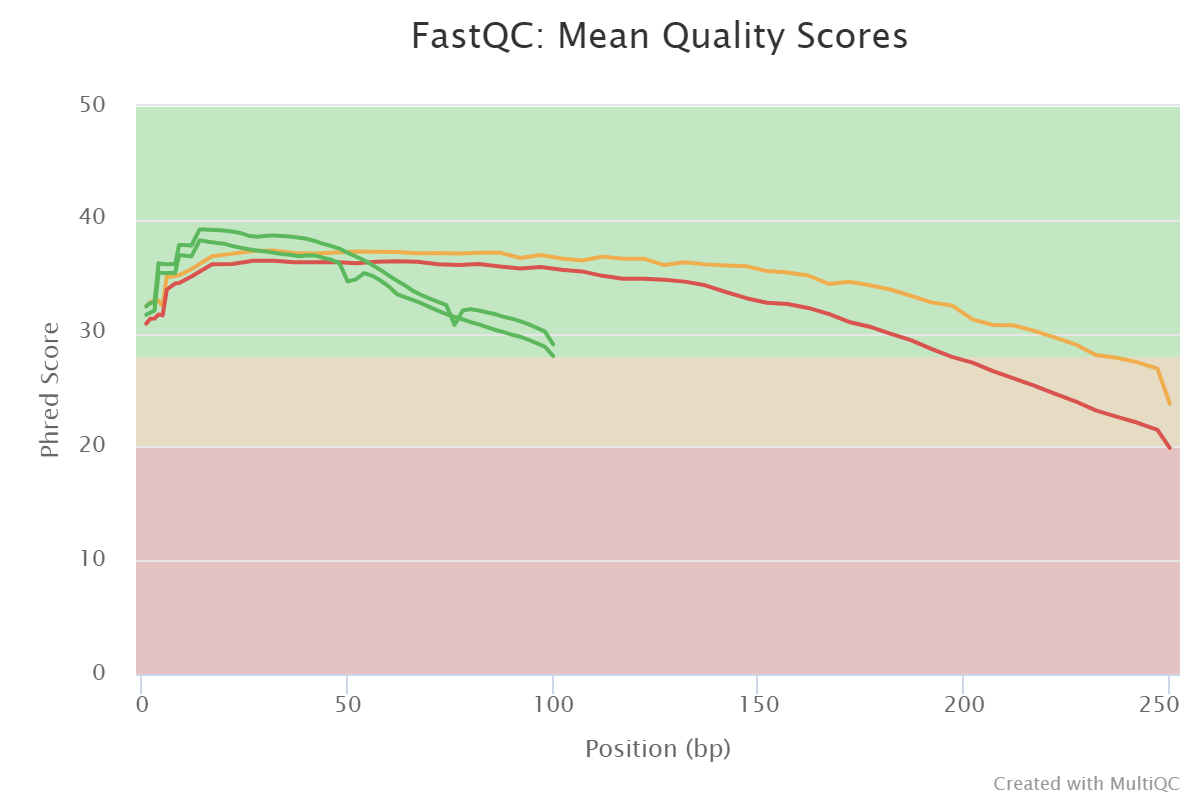

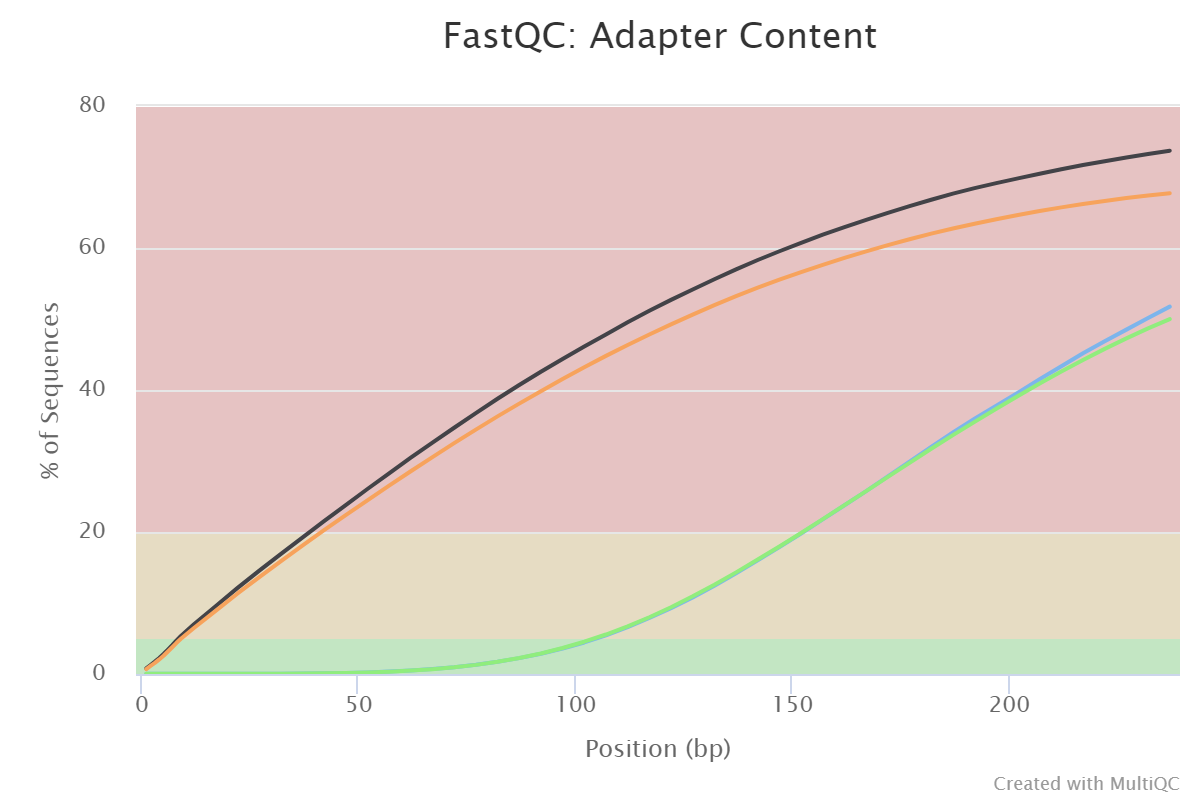

С помощью программ platanus_trim и platanus_internal_trim подрезаем чтения по качеству и удаляем праймеры:
```
$ platanus_trim pe*
$ platanus_internal_trim mp*
```
Удаляем исходные ```fastq``` файлы (они больше не нужны):
```
$ rm pe1.fastq pe2.fastq mp1.fastq mp2.fastq
```
Запустим fastqc, чтобы оценить качество подрезанных чтений:
```
$ mkdir fastqc_trimmed
$ ls pe* mp* | xargs -P 4 -tI{} fastqc -o fastqc_trimmed {}

$ mkdir multiqc_trimmed
$ multiqc -o multiqc_trimmed fastqc_trimmed
```
Скачаем отчет с сервера на локальную машину. Для этого заходим в папку с ключом mykey для доступа на сервер и пишем следующую команду:
```
scp -P 5222 -i mykey akkolchina@92.242.58.92:~/hw1/reads/multiqc_trimmed/multiqc_report.html ~/bio_minor/multiqc_trimmed
```
Открываем html файл multiqc_trimmed и видим следующую статистику:

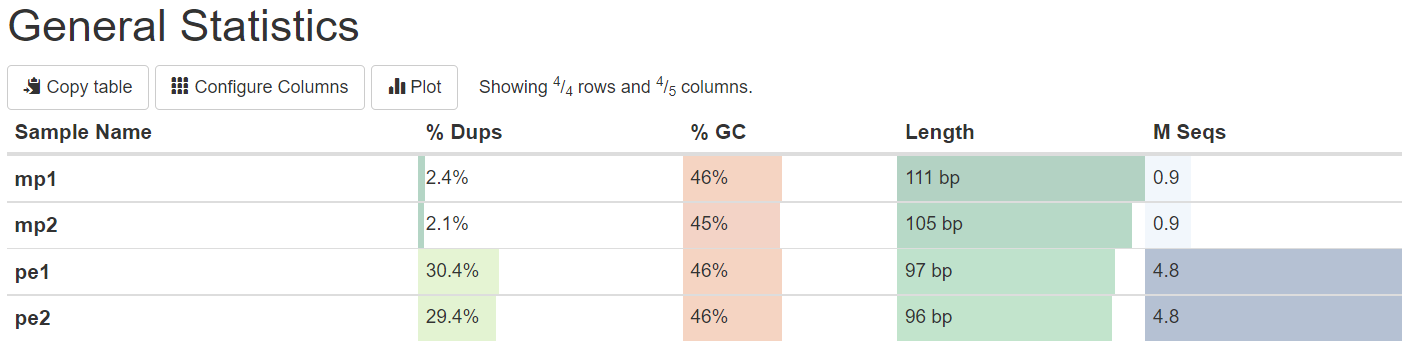

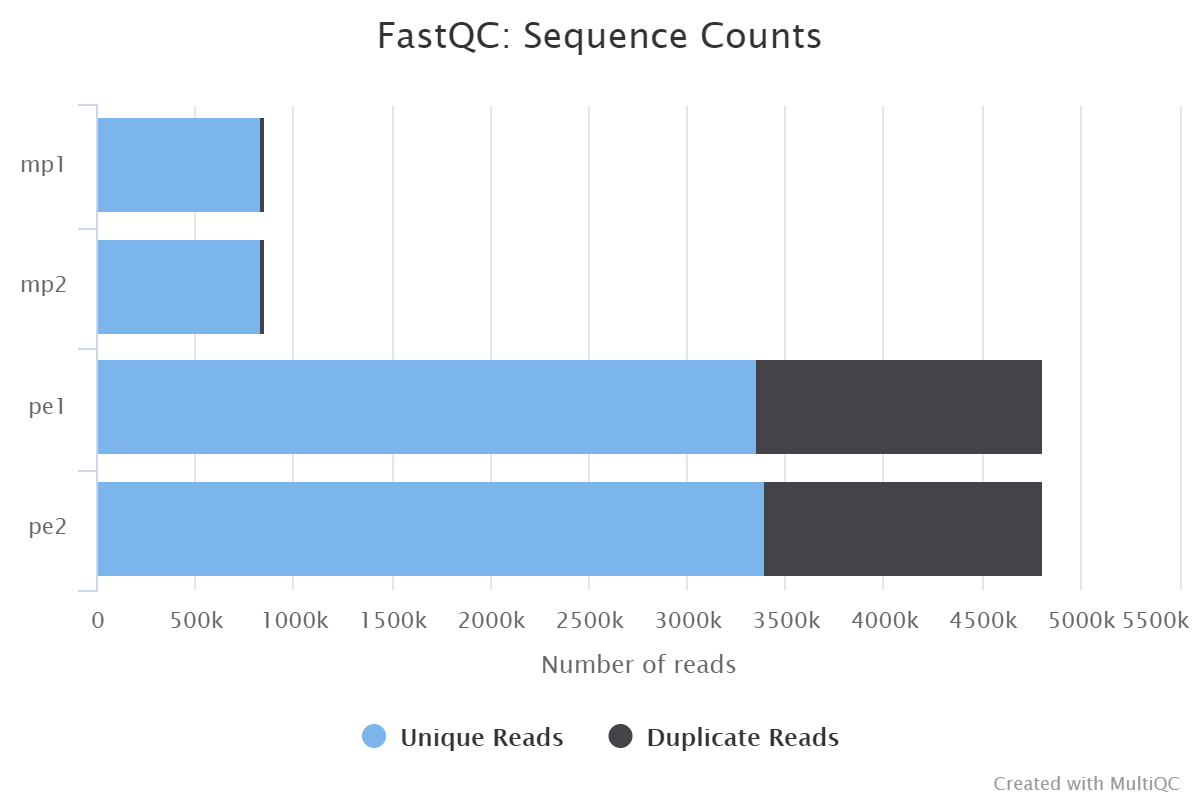

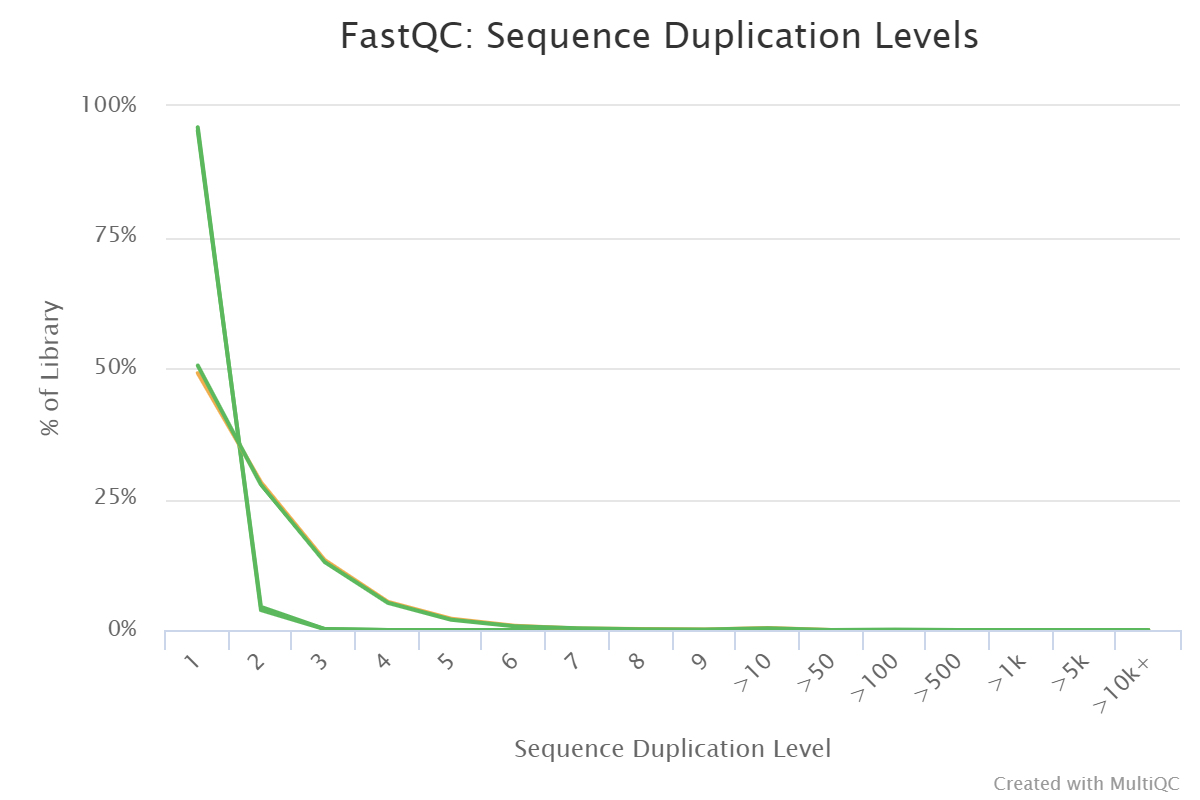

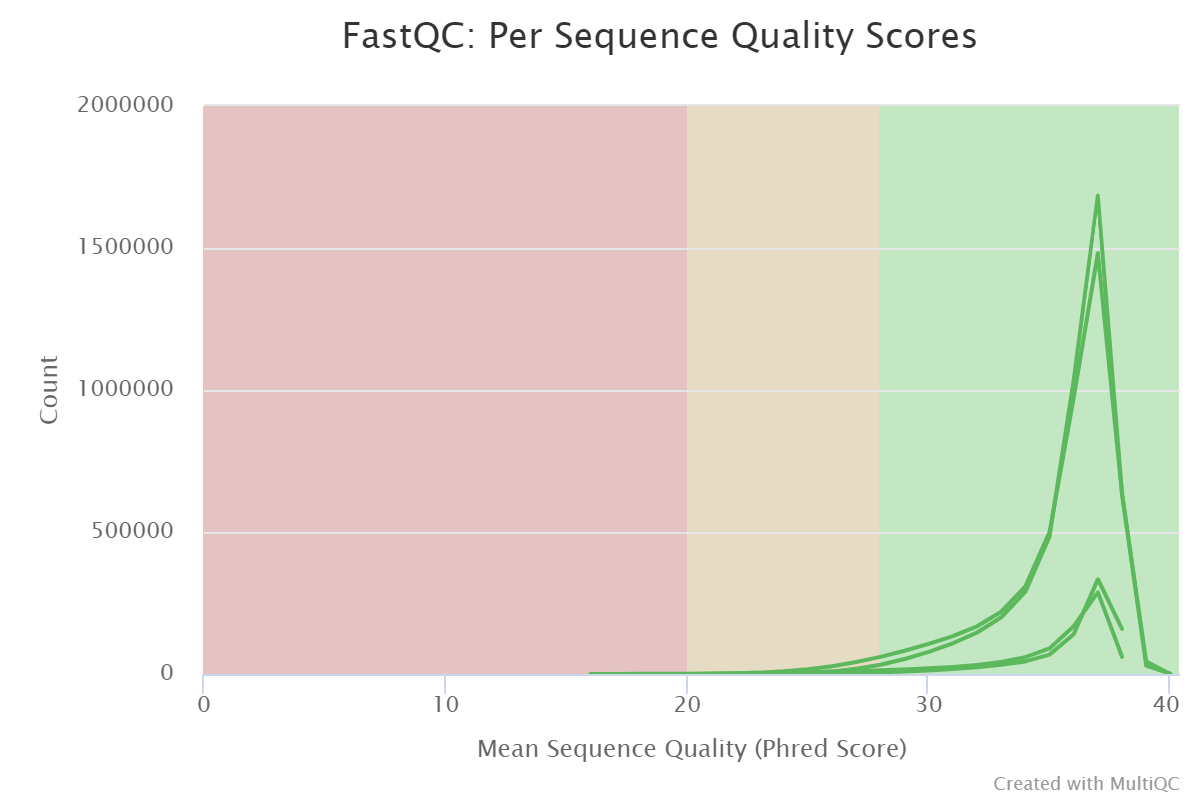

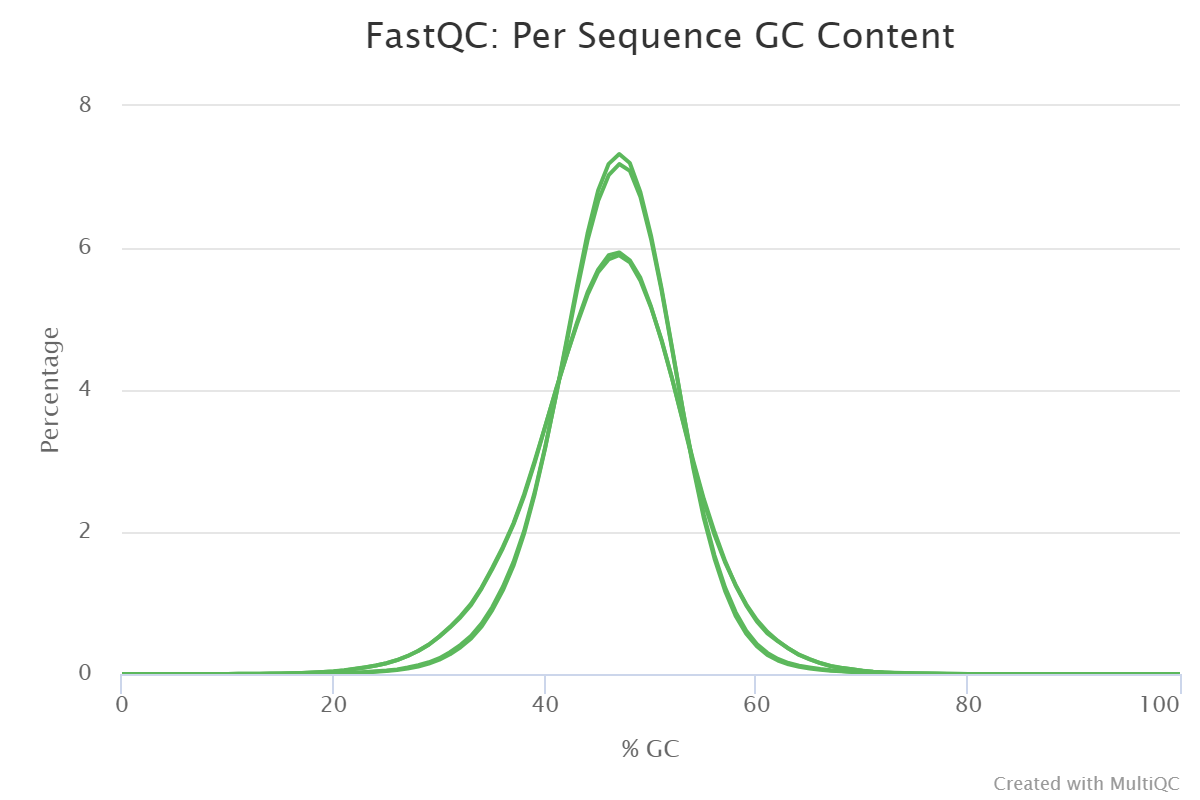

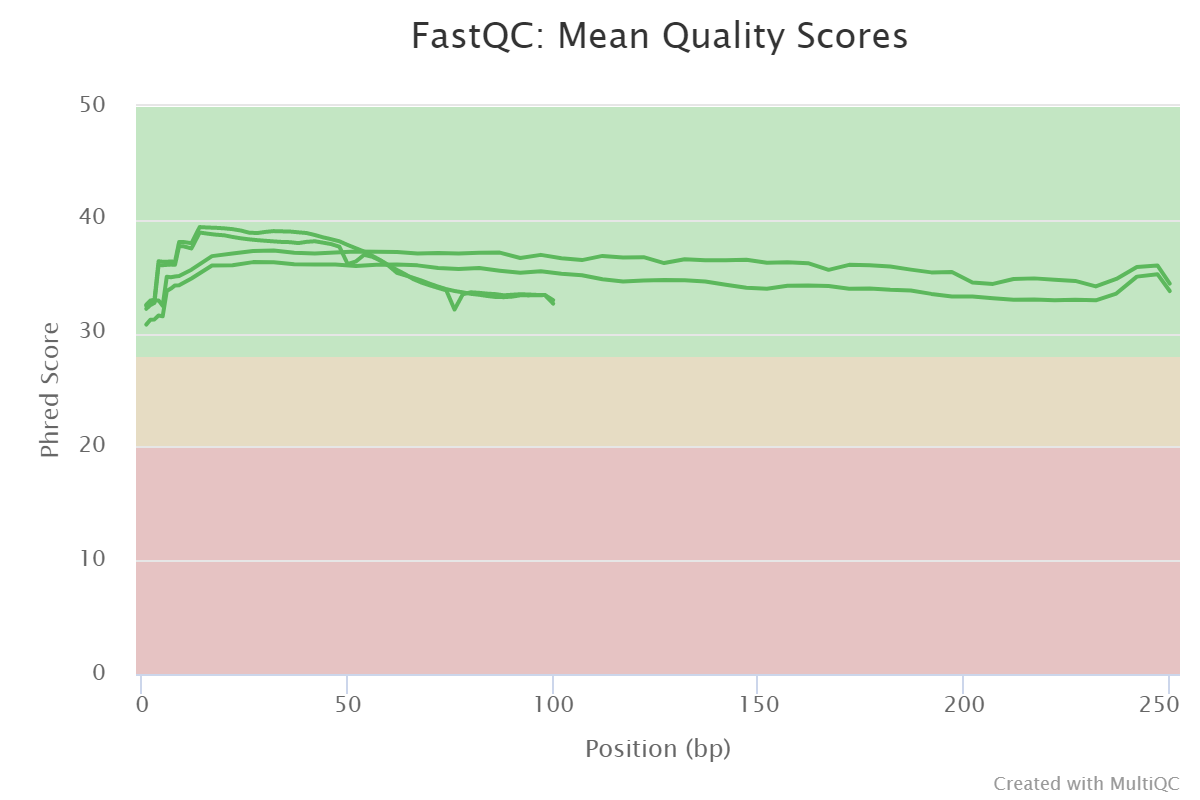

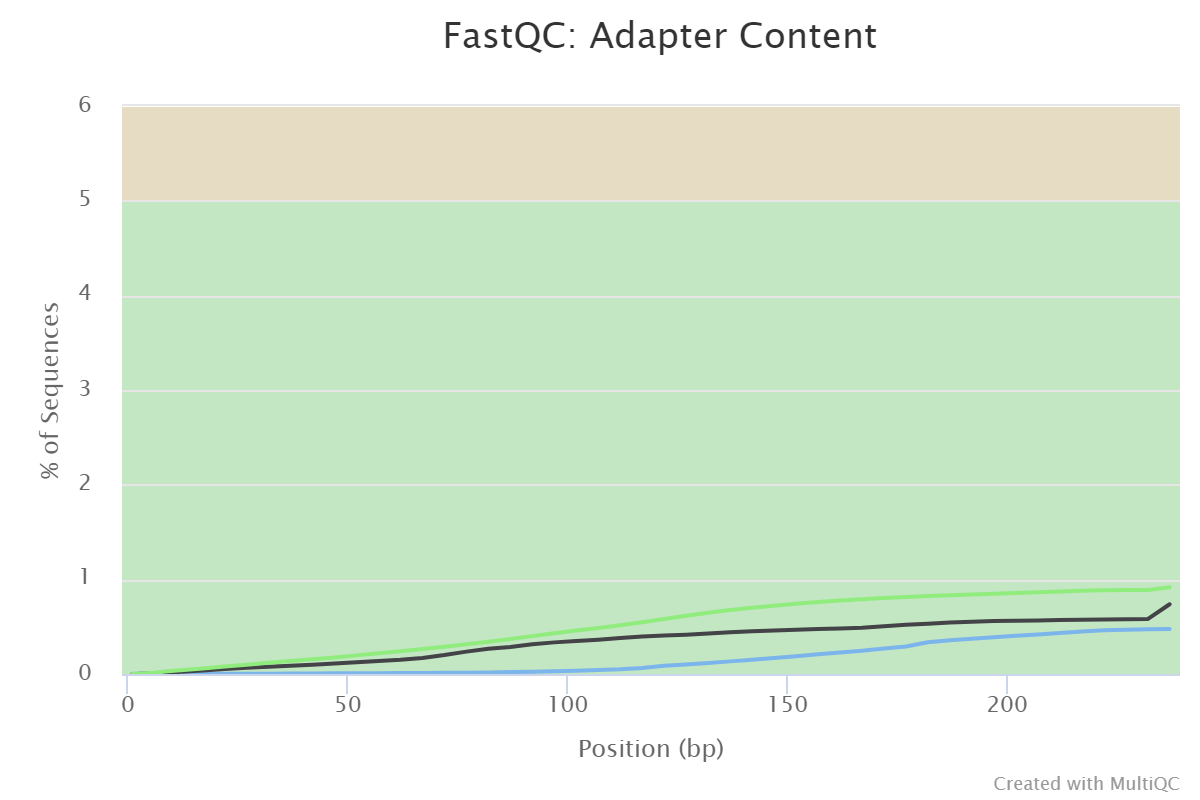

С помощью программы ```platanus assemble``` соберем контиги из подрезанных чтений:
```
$ platanus assemble -o Poil -t 1 -m 16 -f pe1.fastq.trimmed pe2.fastq.trimmed 2>assemble.log
```
Далее проведем анализ полученных контигов:

С помощью программы ```platanus scaffold``` соберем скаффолды из контигов и подрезанных чтений:
```
$ platanus scaffold -o Poil -t 1 -c Poil_contig.fa -IP1 pe1.fastq.trimmed pe2.fastq.trimmed -OP2 mp1.fastq.int_trimmed mp2.fastq.int_trimmed 2> scaffold.log
```
С помощью программы ```platanus gap_close``` уменьшаем кол-во гэпов с помощью подрезанных чтений:
```
$ platanus gap_close -o Poil -t 1 -c Poil_scaffold.fa -IP1 pe1.fastq.trimmed pe2.fastq.trimmed -OP2 mp1.fastq.int_trimmed mp2.fastq.int_trimmed 2> gapclose.log
```
Удалим подрезанные ```fastq``` файлы (они больше не нужны):
```
rm pe* mp*
```

